# 1. EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#EDA 데이터 클린닝
import pandas as pd
import numpy as np


#파일 업로드
filename = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'
df = pd.read_csv(filename)
df = df.drop('Unnamed: 0',axis=1).reset_index(drop=True)

sale_columns = df.filter(regex='_Sales').columns  #_Sales 포함한 컬럼 선택
df_info = df.loc[:,'Name':'Publisher']
def convert (data):
    n_df = df.loc[:,sale_columns]
    return n_df.replace({'K': '/1000', 'M': ''}, regex=True).applymap(pd.eval).astype(float)

df_sales = convert(df)
clean_data = pd.concat([df_info,df_sales],axis=1)
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return x

clean_data['Year'] = clean_data['Year'].apply(year).fillna(0).astype(int)
clean_data = clean_data.fillna(0)

# 필수 과제 3

1.지역별 선호도

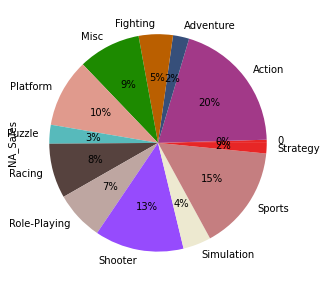

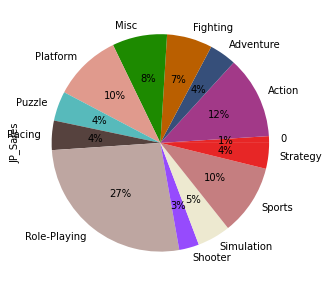

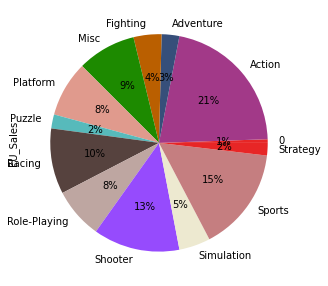

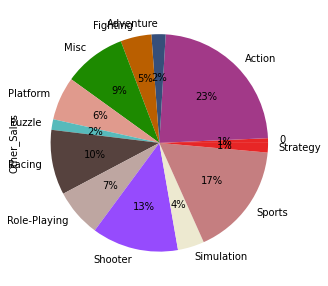

In [8]:
#지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
Gen_df = clean_data.drop(['Name','Platform','Year','Publisher'], axis=1)
Gen_df = Gen_df.groupby('Genre').sum()
colors = ['#E72626','#A23988','#364F7A','#BA5F00','#1D8A00','#E09A8D',
          '#57BABB','#56423E','#BEA6A1','#964BFD','#EDE9D0','#C57E80']
plot_NA = Gen_df.plot.pie(y='NA_Sales',legend=False,autopct='%1.0f%%',colors= colors, figsize=(5, 5))
plot_JP = Gen_df.plot.pie(y='JP_Sales',legend=False,autopct='%1.0f%%',colors= colors, figsize=(5, 5))
plot_EU = Gen_df.plot.pie(y='EU_Sales',legend=False,autopct='%1.0f%%',colors= colors, figsize=(5, 5))
plot_OT = Gen_df.plot.pie(y='Other_Sales',legend=False,autopct='%1.0f%%',colors= colors, figsize=(5, 5))

2.트렌드가 있을까?

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17,0,9,0,30,1,11,14,0,0,3,0,0,17,0,7,34,25,0,16,1,0,0,0,0,0,35,0,30,21,0
1980,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,11,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,1,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,1,0,0,0,1,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,6,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


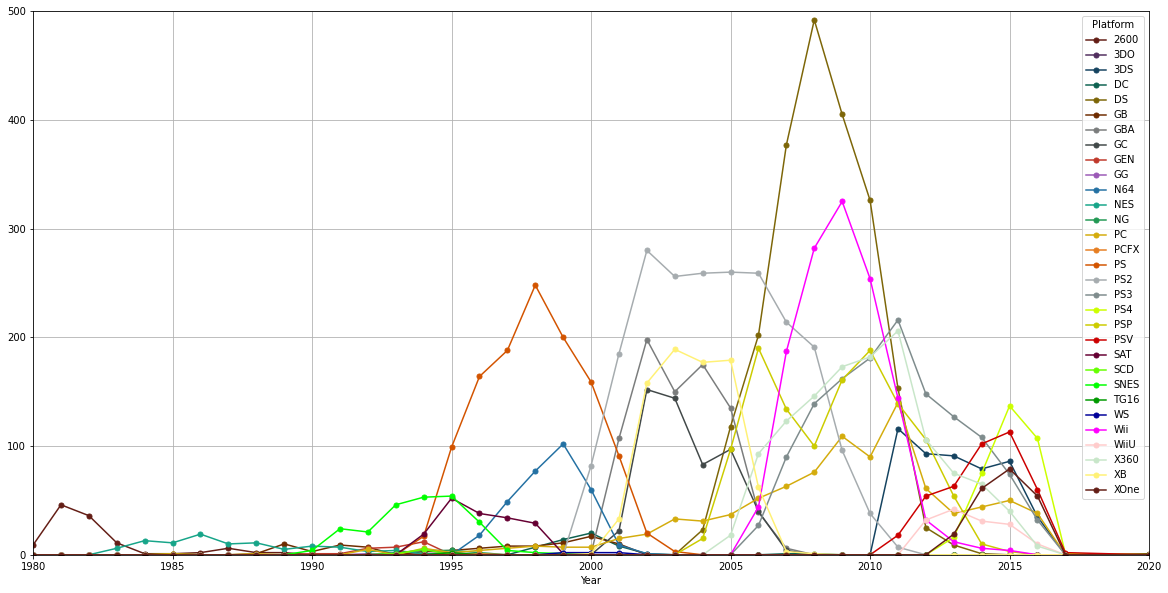

In [147]:
#연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.(1)
import matplotlib.pyplot as plt
import seaborn as sns
Year_df = clean_data.drop(['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
Year_df = pd.crosstab(Year_df.Year,Year_df.Platform)#.sum()
#Year_df['Total'] = Year_df.sum(axis=0)
#Year_df = year_df.drop(year_df.index[0:11])
#plt.plot(Year_df['Year'], Year_df['PS2'])

col = ['#641E16', '#512E5F', '#154360', '#0E6251', '#7D6608', '#6E2C00',
      '#7B7D7D', '#424949', '#C0392B', '#9B59B6', '#2471A3', '#17A589', '#229954',
      '#D4AC0D', '#E67E22', '#D35400', '#A6ACAF', '#7F8C8D', '#CCFF00', '#CCCC00',
      '#CC0000', '#660033', '#66FF00', '#00FF00', '#009900', '#000099', '#FF00FF',
      '#FFCCCC', '#C8E6C9', '#FFF176']
Year_df.plot(figsize=(20, 10), marker='o', ms=5,color = col)
#plt.figure(figsize=(15, 8))colormap = colors_line, 
#plt.plot(Year_df, marker='o', ms=5)
#plt.rcParams['axes.grid'] = True
#plt.rcParams['lines.color'] = col
colum = Year_df.columns
plt.xlim([1980, 2020])
plt.ylim([0, 500])
#Year_df[colum].plot(color = col)

Year_df



,0
Year,
0,271
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


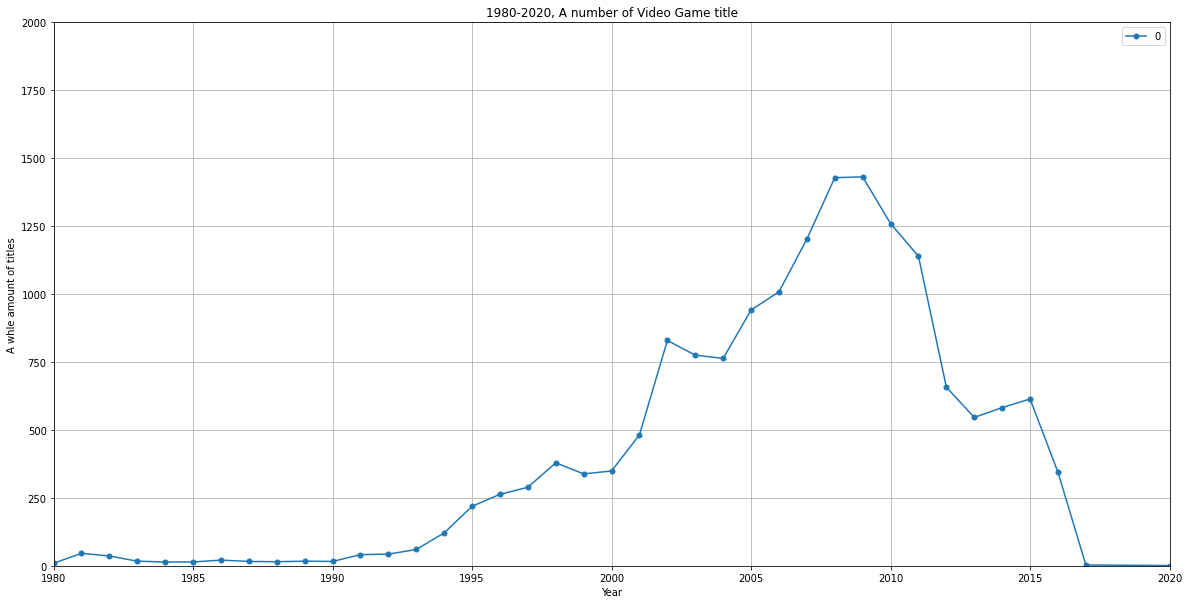

In [160]:
T_Year_df = clean_data.drop(['Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
T_Year_df = pd.crosstab(T_Year_df.Year,T_Year_df.Name,).T.sum()
#T_Year_df  = clean_data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
#Title_df = clean_data.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
T_Year_df = pd.DataFrame(T_Year_df)
T_Year_df.plot(figsize=(20, 10), marker='o', ms=5)
plt.xlim([1980, 2020])
plt.ylim([0, 2000])
plt.xlabel('Year')
plt.ylabel('A whle amount of titles')
plt.title('1980-2020, A number of Video Game title')
T_Year_df

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,,,
Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31
Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24
Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,17.28
Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26
Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,18.14
Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,20.62
Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,6.16,2.04,2.69,0.29,11.18
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38
Super Mario 64,N64,1996,Platform,6.91,2.85,1.91,0.23,11.90


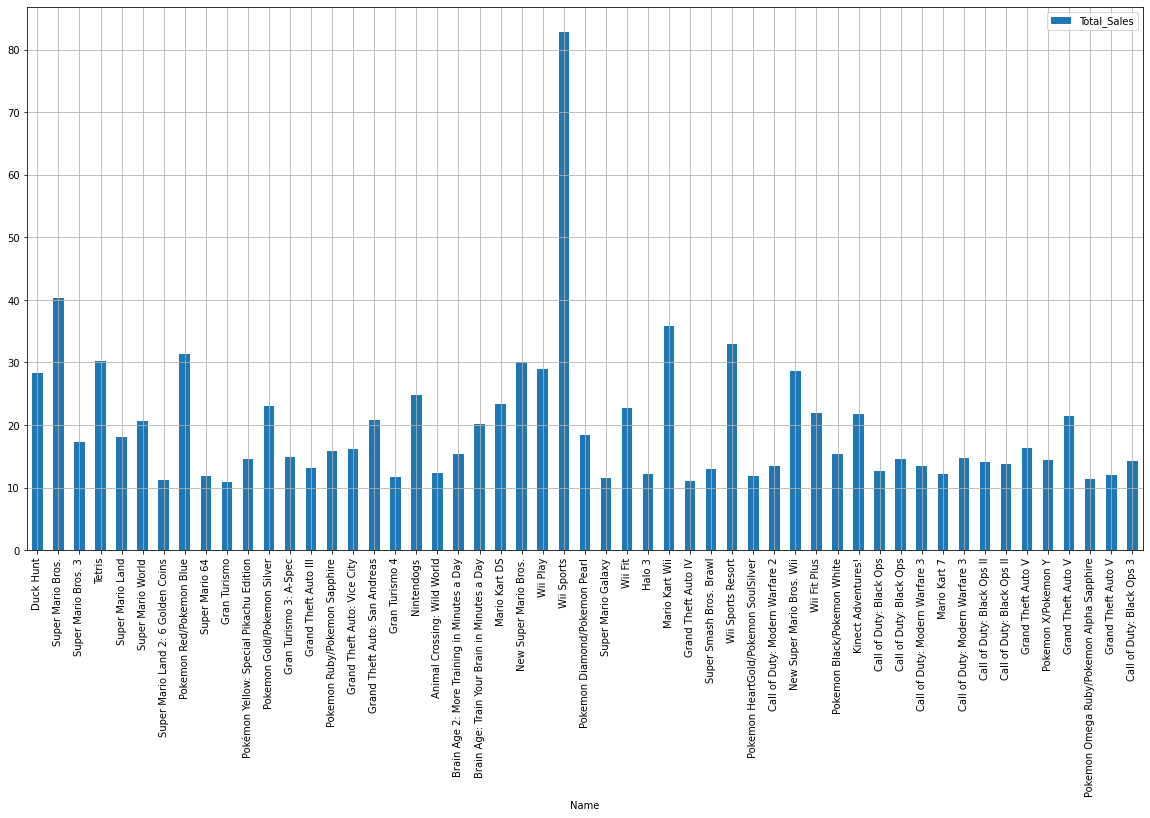

In [157]:
import matplotlib.pyplot as plt
Title_df = clean_data.drop('Publisher',axis=1)
#Title_df = pd.crosstab(Year_df.Year, Year_df.Name)
Title_df['Total_Sales'] = clean_data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
#Title_df = clean_data.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
Title_df = Title_df.sort_values(by=['Total_Sales'],ascending=False).head(53)
Title_df = Title_df.sort_values(by='Year').set_index('Name',drop=True).sort_values('Year')
Title_df_T = Title_df.drop(['NA_Sales','Other_Sales','JP_Sales','EU_Sales','Year'],axis=1)
Title_df_T.plot(kind='bar',figsize=(20,10))
Title_df